<a href="https://colab.research.google.com/github/jsotoacebal/Analisis_predictivo/blob/main/TP2_analisis_predictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [3]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [4]:
with open("/content/drive/MyDrive/1Q2023/Kaggle/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c analisis-predictivo-2023q1


  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 152MB/s]


In [5]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [6]:
import pandas as pd
#Cargar datos
df = pd.read_csv('base_train.csv')
print(df.head())

       id           source                                               name  \
0  528022      city scrape                                     Somewhere Else   
1    2818      city scrape          Quiet Garden View Room & Super Fast Wi-Fi   
2   20168  previous scrape       Studio with private bathroom in the centre 1   
3   27886      city scrape  Romantic, stylish B&B houseboat in canal district   
4   28871      city scrape                            Comfortable double room   

                                         description  \
0  Highlights<br />*Located only 5 minutes from C...   
1  Quiet Garden View Room & Super Fast Wi-Fi<br /...   
2  17th century Dutch townhouse in the heart of t...   
3  Stylish and romantic houseboat on fantastic hi...   
4  <b>The space</b><br />In a monumental house ri...   

                               neighborhood_overview  host_id  host_name  \
0                                                NaN  2594559        Els   
1  Indische Buurt ("Indi

In [7]:
print('Cantidad de Filas y columnas:', df.shape)

Cantidad de Filas y columnas: (4928, 68)


In [8]:
#Cantidad de datos duplicados
df.duplicated().sum()

0

In [9]:
df.dtypes

id                                                int64
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 68, dtype: object

In [10]:
df[['first_review','last_review']][(df['last_review']!=0) & (df['last_review'] < df['first_review'])]

#No hay fecha de review anterior al primero

,first_review,last_review


In [11]:
df_numeric = df.select_dtypes(include=['int', 'float'])

df_obj = df.select_dtypes(include=['object'])

print(df_obj.head())

print(df_numeric.head())

            source                                               name  \
0      city scrape                                     Somewhere Else   
1      city scrape          Quiet Garden View Room & Super Fast Wi-Fi   
2  previous scrape       Studio with private bathroom in the centre 1   
3      city scrape  Romantic, stylish B&B houseboat in canal district   
4      city scrape                            Comfortable double room   

                                         description  \
0  Highlights<br />*Located only 5 minutes from C...   
1  Quiet Garden View Room & Super Fast Wi-Fi<br /...   
2  17th century Dutch townhouse in the heart of t...   
3  Stylish and romantic houseboat on fantastic hi...   
4  <b>The space</b><br />In a monumental house ri...   

                               neighborhood_overview  host_name  host_since  \
0                                                NaN        Els  2012-06-10   
1  Indische Buurt ("Indies Neighborhood") is a ne...     Daniel  2

In [12]:
#Remove $ and , from price variable
import pandas as pd
df = pd.read_csv("base_train.csv")
print(df)
df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')
df.price = df.price.astype(float)
print(df.price)
#Make price numeric
df.price = pd.to_numeric(df.price, errors='coerce')
print(df.price)
#Remove % from host_response_rate variable
import pandas as pd
df = pd.read_csv("base_train.csv")
print(df)
df.host_response_rate = df.host_response_rate.str.replace('%', '')
df.host_response_rate = df.host_response_rate.astype(float)
print(df.host_response_rate)
#Make host_response_rate numeric
df.host_response_rate = pd.to_numeric(df.host_response_rate, errors='coerce')
print(df.host_response_rate)

#host_since variable
df.host_since = pd.to_datetime(df.host_since)
print(df.host_since)

#Host acceptance rate, remove % and make numeric
df.host_acceptance_rate = df.host_acceptance_rate.str.replace('%', '')
df.host_acceptance_rate = df.host_acceptance_rate.astype(float)
print(df.host_acceptance_rate)
#Make host_acceptance_rate numeric
df.host_acceptance_rate = pd.to_numeric(df.host_acceptance_rate, errors='coerce')
print(df.host_acceptance_rate)

                      id           source  \
0                 528022      city scrape   
1                   2818      city scrape   
2                  20168  previous scrape   
3                  27886      city scrape   
4                  28871      city scrape   
...                  ...              ...   
4923  567407960487712181      city scrape   
4924  567829002669570759      city scrape   
4925  567927199868989828      city scrape   
4926  567958632398468204      city scrape   
4927  568514877303578111      city scrape   

                                                   name  \
0                                        Somewhere Else   
1             Quiet Garden View Room & Super Fast Wi-Fi   
2          Studio with private bathroom in the centre 1   
3     Romantic, stylish B&B houseboat in canal district   
4                               Comfortable double room   
...                                                 ...   
4923  Charming apartment in Oud-West, next to 

<ipython-input-12-466aa7718fc9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.price = df.price.str.replace('$', '')


                      id           source  \
0                 528022      city scrape   
1                   2818      city scrape   
2                  20168  previous scrape   
3                  27886      city scrape   
4                  28871      city scrape   
...                  ...              ...   
4923  567407960487712181      city scrape   
4924  567829002669570759      city scrape   
4925  567927199868989828      city scrape   
4926  567958632398468204      city scrape   
4927  568514877303578111      city scrape   

                                                   name  \
0                                        Somewhere Else   
1             Quiet Garden View Room & Super Fast Wi-Fi   
2          Studio with private bathroom in the centre 1   
3     Romantic, stylish B&B houseboat in canal district   
4                               Comfortable double room   
...                                                 ...   
4923  Charming apartment in Oud-West, next to 

In [13]:
import pandas as pd

# Import the CSV file
df = pd.read_csv("base_train.csv")

# Remove $ and , from price variable
df.price = df.price.str.replace('$', '')
df.price = df.price.str.replace(',', '')
df.price = df.price.astype(float)

# Make price numeric
df.price = pd.to_numeric(df.price, errors='coerce')

# Remove % from host_response_rate variable
df.host_response_rate = df.host_response_rate.str.replace('%', '')
df.host_response_rate = df.host_response_rate.astype(float)

# Make host_response_rate numeric
df.host_response_rate = pd.to_numeric(df.host_response_rate, errors='coerce')

# Convert host_since variable to datetime
df.host_since = pd.to_datetime(df.host_since)

# Remove % from host_acceptance_rate variable
df.host_acceptance_rate = df.host_acceptance_rate.str.replace('%', '')
df.host_acceptance_rate = df.host_acceptance_rate.astype(float)

# Make host_acceptance_rate numeric
df.host_acceptance_rate = pd.to_numeric(df.host_acceptance_rate, errors='coerce')

# Print the updated DataFrame
print(df)

                      id           source  \
0                 528022      city scrape   
1                   2818      city scrape   
2                  20168  previous scrape   
3                  27886      city scrape   
4                  28871      city scrape   
...                  ...              ...   
4923  567407960487712181      city scrape   
4924  567829002669570759      city scrape   
4925  567927199868989828      city scrape   
4926  567958632398468204      city scrape   
4927  568514877303578111      city scrape   

                                                   name  \
0                                        Somewhere Else   
1             Quiet Garden View Room & Super Fast Wi-Fi   
2          Studio with private bathroom in the centre 1   
3     Romantic, stylish B&B houseboat in canal district   
4                               Comfortable double room   
...                                                 ...   
4923  Charming apartment in Oud-West, next to 

<ipython-input-13-276168ebd416>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.price = df.price.str.replace('$', '')


In [14]:
print(df.price)

0       100.0
1        59.0
2       106.0
3       140.0
4        75.0
        ...  
4923    301.0
4924    120.0
4925    153.0
4926    231.0
4927    160.0
Name: price, Length: 4928, dtype: float64


<ipython-input-15-2cee96131f0d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df.price,kde_kws=dict(bw=0.2))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


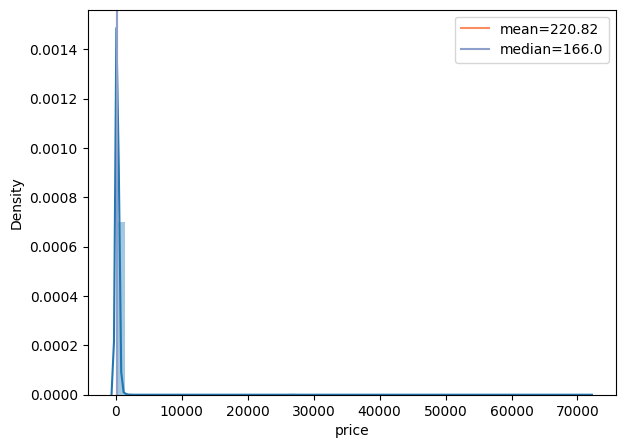

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
precios = dict(mean=df.price.mean(),
              median=df.price.median())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(df.price,kde_kws=dict(bw=0.2))
ax1.axvline(x=precios["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(precios['mean'],2)}")
ax1.axvline(x=precios["median"],c=sns.color_palette("Set2")[2],label=f"median={round(precios['median'],2)}")
plt.legend()

<Axes: xlabel='price', ylabel='Density'>

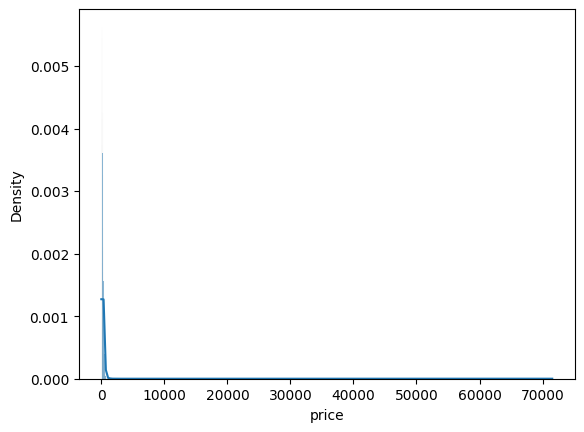

In [16]:
import seaborn as sns

sns.histplot(df["price"], kde=True, stat="density")

In [17]:
df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.928000e+03,4.928000e+03,3266.000000,4152.000000,4928.000000,4928.000000,0.0,4928.000000,4928.000000,4928.000000,...,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4928.000000,4928.000000,4928.000000,4928.000000,4928.000000
mean,6.294489e+15,8.186850e+07,95.018065,80.490848,2.508929,4.768872,NaN,52.367291,4.890984,2.915381,...,4.757839,4.879411,4.888109,4.788587,4.650321,1.919846,0.953734,0.847808,0.052963,1.159996
std,5.873144e+16,1.114891e+08,14.594152,26.512724,10.565612,28.580679,NaN,0.016869,0.035833,1.418921,...,0.292974,0.206738,0.216055,0.225730,0.268705,2.664493,1.379593,2.154187,0.507139,2.504318
min,2.818000e+03,3.159000e+03,0.000000,0.000000,1.000000,1.000000,NaN,52.290340,4.755710,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.135244e+07,8.692070e+06,100.000000,67.000000,1.000000,1.000000,NaN,52.356657,4.868110,2.000000,...,4.660000,4.840000,4.860000,4.680000,4.530000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,2.437740e+07,2.735878e+07,100.000000,95.000000,1.000000,1.000000,NaN,52.366640,4.888395,2.000000,...,4.840000,4.940000,4.960000,4.840000,4.690000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,4.038502e+07,1.056092e+08,100.000000,100.000000,2.000000,3.000000,NaN,52.376990,4.908610,4.000000,...,4.960000,5.000000,5.000000,4.960000,4.810000,1.000000,1.000000,1.000000,0.000000,1.240000
max,5.685149e+17,4.865512e+08,100.000000,100.000000,363.000000,673.000000,NaN,52.425120,5.026430,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,14.000000,20.000000,8.000000,106.740000


In [18]:
# Agrupar por tipo de propiedad y calcular el precio promedio
precio_avg_type = df.groupby('property_type')['price'].mean()
print(precio_avg_type)

property_type
Barn                                   85.000000
Boat                                  310.583333
Camper/RV                              96.333333
Entire cabin                          121.666667
Entire chalet                         120.000000
Entire condo                          235.351544
Entire cottage                        302.750000
Entire guest suite                    141.000000
Entire guesthouse                     167.461538
Entire home                           267.698462
Entire loft                           282.256000
Entire place                          303.285714
Entire rental unit                    206.504748
Entire serviced apartment             263.245283
Entire townhouse                      272.784810
Entire vacation home                  209.800000
Entire villa                          339.250000
Houseboat                             313.367347
Private room                          156.714286
Private room in bed and breakfast     160.353414
Privat

In [19]:
# Calcular la cantidad de valores faltantes por columna
missing_values = df.isna().sum()

# Seleccionar las columnas con más de 500 valores faltantes
drop_cols = list(missing_values[missing_values > 500].index)

# Imprimir las columnas a eliminar
print(drop_cols)

# Eliminar las columnas con más de 500 valores faltantes
#f = df.drop(drop_cols, axis=1)

print(df.info())

print(df['neighbourhood_cleansed'].unique)

['neighborhood_overview', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4928 non-null   int64         
 1   source                                        4928 non-null   object        
 2   name                                          4928 non-null   object        
 3   description                                   4925 non-null   object        
 4   neighborhood_overview                         3580 non-null   object        
 5   host_id                                       4928 non-null   int64         
 6   host_name           

In [20]:
#Price_category
import numpy as np
df.price = pd.to_numeric(df.price, errors='coerce')
print(df.price)
df['price_category'] = pd.cut(df['price'], bins=[0, 100, 500, np.inf], labels=['Cheap', 'Medium', 'Expensive'])
print(df.price_category)

0       100.0
1        59.0
2       106.0
3       140.0
4        75.0
        ...  
4923    301.0
4924    120.0
4925    153.0
4926    231.0
4927    160.0
Name: price, Length: 4928, dtype: float64
0        Cheap
1        Cheap
2       Medium
3       Medium
4        Cheap
         ...  
4923    Medium
4924    Medium
4925    Medium
4926    Medium
4927    Medium
Name: price_category, Length: 4928, dtype: category
Categories (3, object): ['Cheap' < 'Medium' < 'Expensive']


In [21]:
#New variables
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import datetime
#host_since variable
df.host_since = pd.to_datetime(df.host_since)
print(df.host_since)
#host_since_days with the number of days since the host is in Airbnb
df['host_since_days'] = (datetime.datetime.now() - df['host_since']).dt.days
print(df.host_since_days)

#host_has_profile_pic_bin with 1 if host_has_profile_pic is t and 0 otherwise
df['host_has_profile_pic_bin'] = np.where(df['host_has_profile_pic'] == 't', 1, 0)
print(df.host_has_profile_pic_bin)

#host_identity_verified_bin with 1 if host_identity_verified is t and 0 otherwise
df['host_identity_verified_bin'] = np.where(df['host_identity_verified'] == 't', 1, 0)
print(df.host_identity_verified_bin)

0      2012-06-10
1      2008-09-24
2      2009-12-02
3      2010-03-23
4      2010-05-13
          ...    
4923   2014-10-27
4924   2016-01-24
4925   2022-02-22
4926   2018-07-21
4927   2014-11-13
Name: host_since, Length: 4928, dtype: datetime64[ns]
0       3994
1       5349
2       4915
3       4804
4       4753
        ... 
4923    3125
4924    2671
4925     450
4926    1762
4927    3108
Name: host_since_days, Length: 4928, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
4923    1
4924    1
4925    1
4926    1
4927    1
Name: host_has_profile_pic_bin, Length: 4928, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
4923    1
4924    1
4925    1
4926    1
4927    1
Name: host_identity_verified_bin, Length: 4928, dtype: int64


<Axes: xlabel='number_of_reviews'>

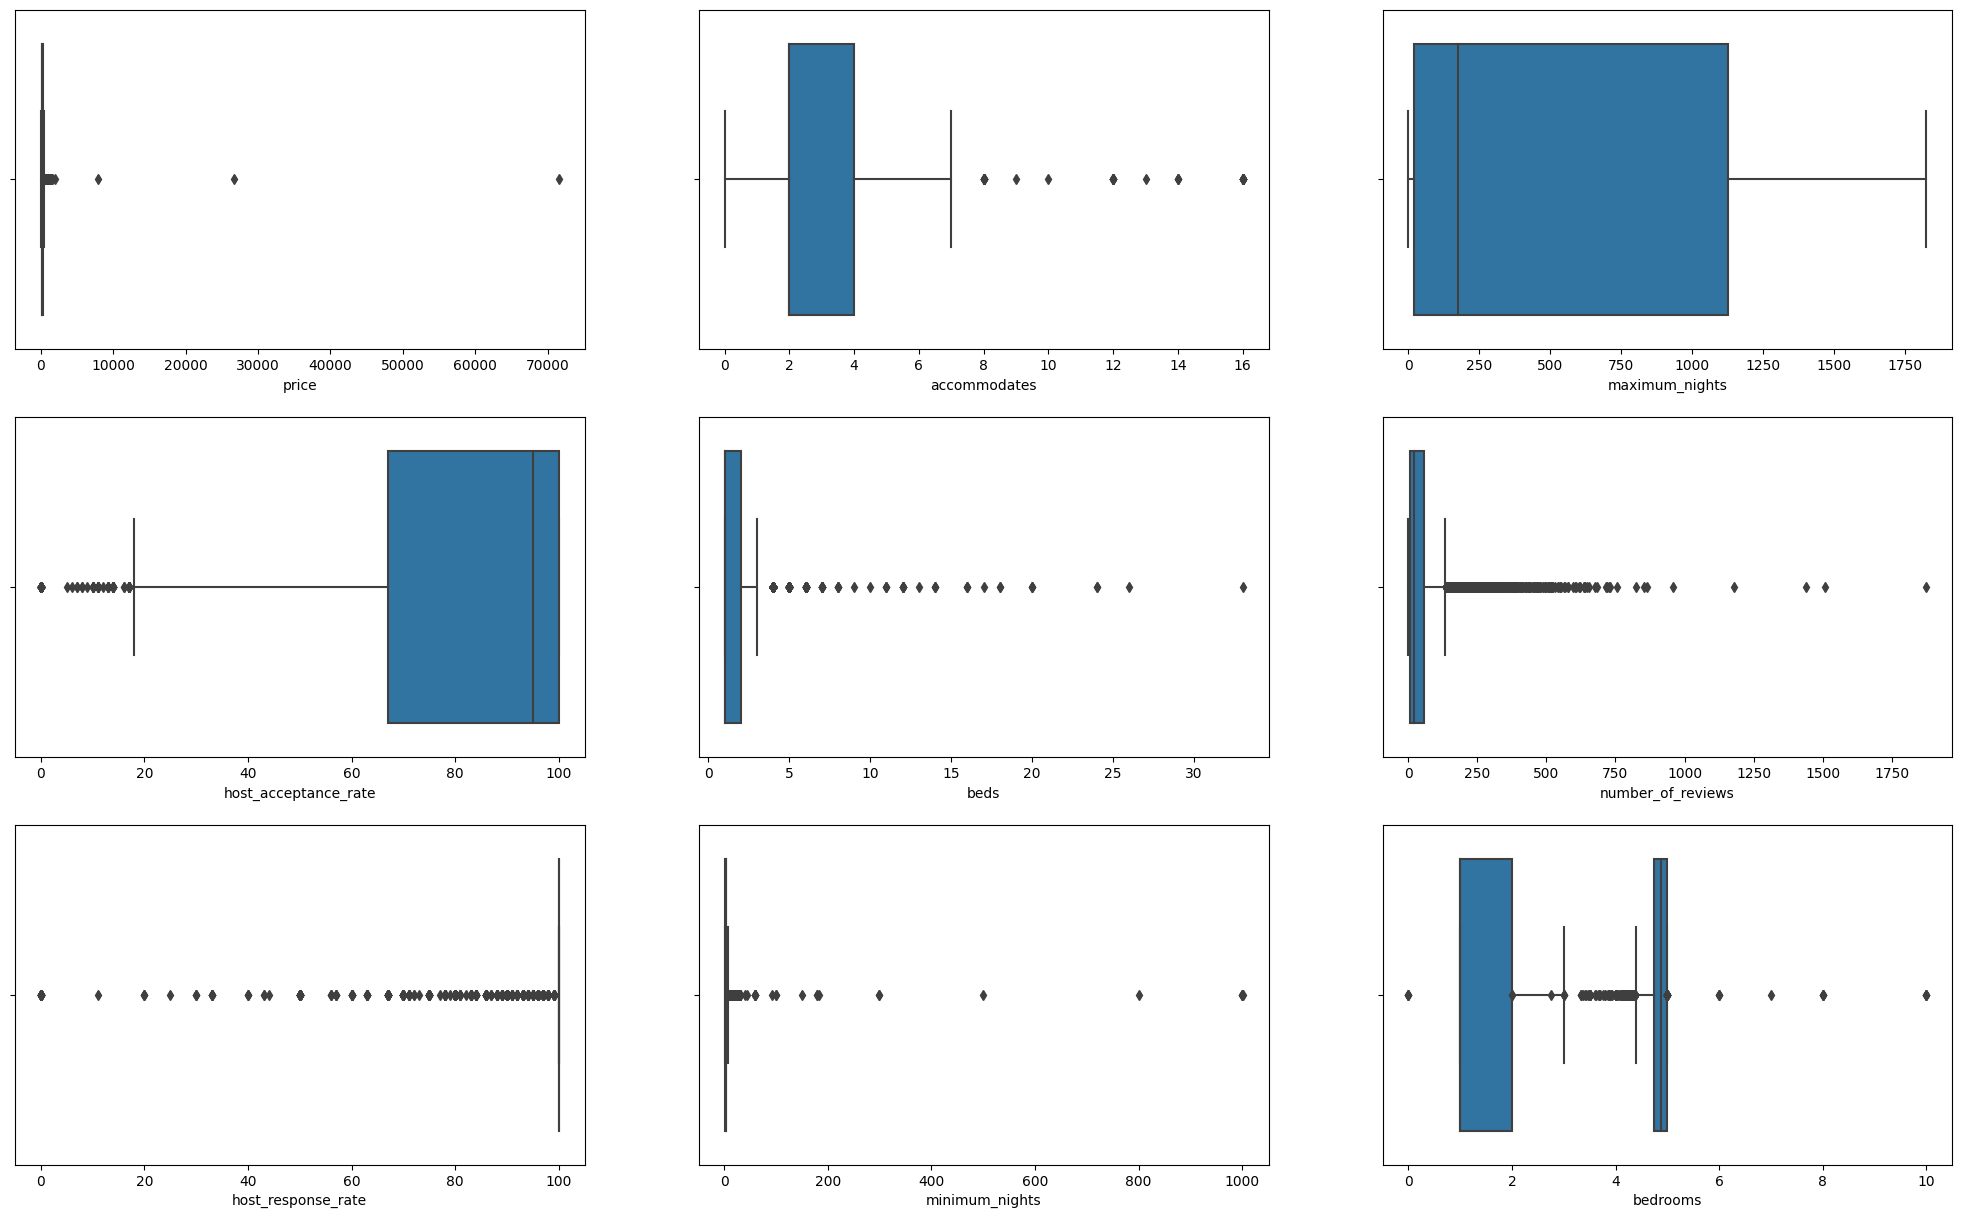

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3, figsize=(25, 15))

#No funciona cuando tiene un 0 en y

sns.boxplot(x=df["price"],ax=axs[0,0])
sns.boxplot(x=df["host_acceptance_rate"],ax=axs[1,0],orient='h')
sns.boxplot(x=df["host_response_rate"],ax=axs[2,0],orient='h')
sns.boxplot(x=df["accommodates"],ax=axs[0,1])
sns.boxplot(x=df["review_scores_rating"],ax=axs[2,2])
sns.boxplot(x=df["bedrooms"],ax=axs[2,2])
sns.boxplot(x=df["beds"],ax=axs[1,1])
sns.boxplot(x=df["minimum_nights"],ax=axs[2,1])
sns.boxplot(x=df["maximum_nights"],ax=axs[0,2])
sns.boxplot(x=df["number_of_reviews"],ax=axs[1,2])

In [23]:
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.corr()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,host_has_profile_pic_bin,host_identity_verified_bin
id,1.000000,0.050757,-0.015929,-0.020511,-0.005868,-0.006068,NaN,0.003063,0.008935,-0.006039,...,0.008272,0.018798,-0.013142,-0.011584,-0.011898,0.026815,0.013378,-0.056361,0.004322,0.004268
host_id,0.050757,1.000000,-0.049415,0.205238,0.060176,-0.009524,NaN,0.000912,-0.034085,-0.022672,...,-0.016262,-0.154312,0.297220,-0.005150,0.302244,0.154945,0.174807,-0.929380,-0.107361,-0.038557
host_response_rate,-0.015929,-0.049415,1.000000,0.329093,0.014540,-0.001337,NaN,0.031452,0.014289,-0.027315,...,0.008098,0.011997,0.007930,-0.069876,0.041032,0.012307,0.078627,0.042869,0.019653,0.067041
host_acceptance_rate,-0.020511,0.205238,0.329093,1.000000,0.074791,0.045055,NaN,0.054616,0.021750,-0.037306,...,-0.037173,-0.104769,0.185616,-0.062414,0.232112,0.069094,0.204748,-0.196475,0.026504,0.072434
host_listings_count,-0.005868,0.060176,0.014540,0.074791,1.000000,0.659979,NaN,0.017001,-0.017544,-0.007822,...,-0.019031,-0.078282,0.290473,0.133409,0.225876,0.079135,0.045470,-0.034099,0.005282,0.040628
host_total_listings_count,-0.006068,-0.009524,-0.001337,0.045055,0.659979,1.000000,NaN,0.005187,-0.013552,-0.000703,...,-0.004714,-0.099640,0.188160,0.175654,0.092794,0.074752,0.015398,0.040084,0.005142,0.037253
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.003063,0.000912,0.031452,0.054616,0.017001,0.005187,NaN,1.000000,-0.089738,0.060928,...,-0.004947,-0.013572,0.071828,0.043588,0.044791,0.065541,0.009951,0.001332,0.019396,0.019194
longitude,0.008935,-0.034085,0.014289,0.021750,-0.017544,-0.013552,NaN,-0.089738,1.000000,0.086955,...,0.025419,0.030187,-0.031294,-0.028554,-0.031963,0.011897,-0.038623,0.026402,0.006972,0.011155
accommodates,-0.006039,-0.022672,-0.027315,-0.037306,-0.007822,-0.000703,NaN,0.060928,0.086955,1.000000,...,-0.074940,-0.066334,-0.037441,0.166381,-0.117826,-0.066259,-0.071951,0.025801,0.004700,0.019766


<Axes: >

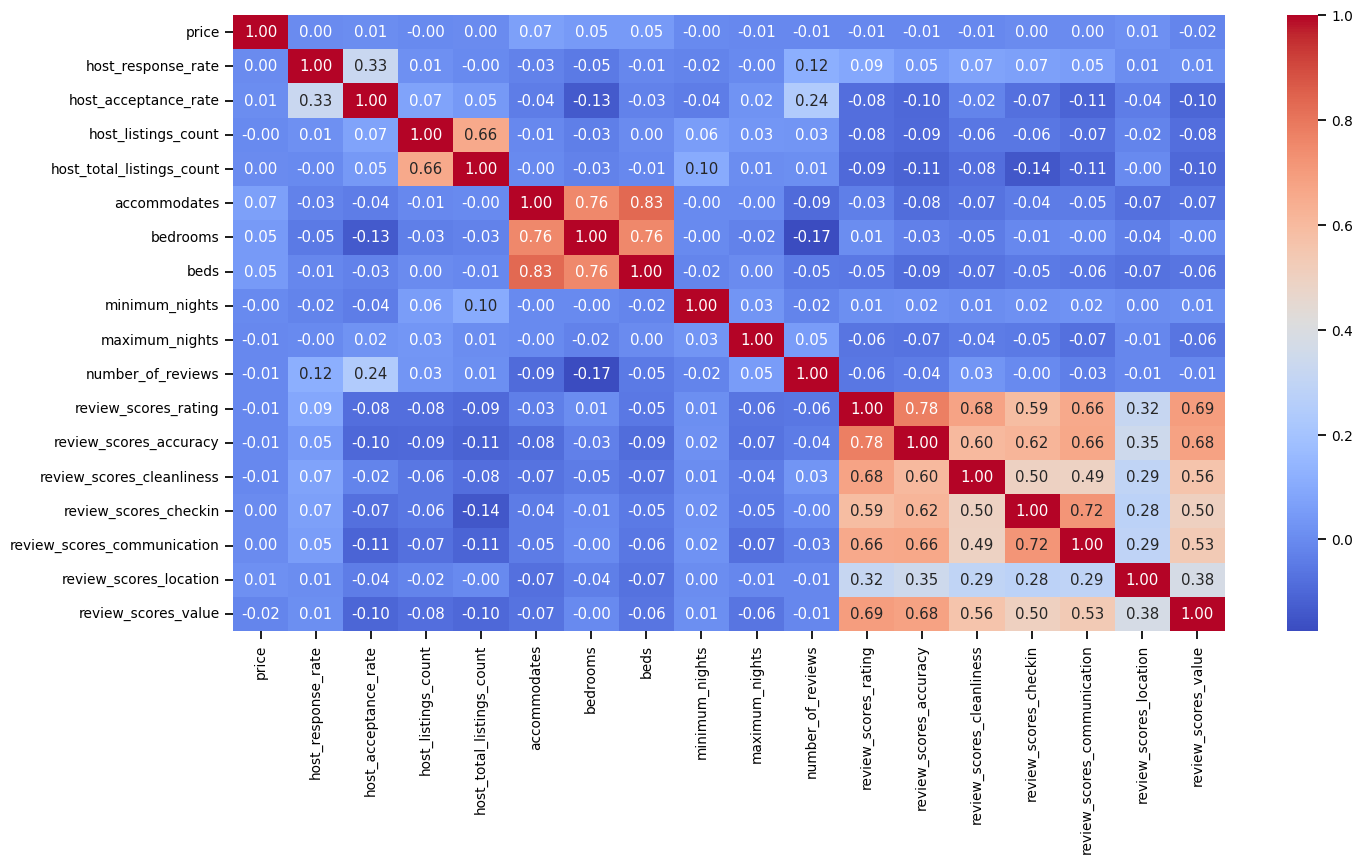

In [24]:
#Crear nueva columna host listing 1 o 0
#host_is_superhost
#host_has_profile_pic
#host_identity_verified
#instant_bookable

dr_num2 = df[['price','host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

sns.set_context('notebook', font_scale=0.9)
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(ax = ax, data = dr_num2.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Intento de feature importance

In [27]:
from pandas_profiling import ProfileReport


ModuleNotFoundError: ignored

In [ ]:
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [ ]:
df = pd.read_csv('base_train.csv')

prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [ ]:
import pandas as pd
df = pd.read_csv('base_train.csv')


In [ ]:
## Ahora corremos el reporte
report = df.profile_report(sort='None', html={'style':{'full_width':True}})

In [ ]:
report

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [ ]:
X=df
y = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(df.feature_names[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
#Ejemplo
#Adaptar a modelo
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Seleccionamos solamente la columna 5 del dataset
X = df.review_scores_rating
#Defino los datos correspondientes a las etiquetas
y = df['number_of_reviews']
#Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Rating')
plt.ylabel('Cantidad de reviews')
plt.show()

# Modelo

In [28]:
X=X.values.reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

NameError: ignored

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, y_train)
#Realizo una predicción
Y_pred = lr.predict(X_test)

In [ ]:
#REGRESIÓN MULTIPLE
vars=['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'accommodates', 'beds', 'bedrooms',
       'minimum_nights']

In [ ]:
X=df[vars]
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X, y))

In [29]:
#Remove the variables that are not numeric
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num)

                      id    host_id  host_response_rate  host_acceptance_rate  \
0                 528022    2594559                87.0                  96.0   
1                   2818       3159               100.0                 100.0   
2                  20168      59484               100.0                  98.0   
3                  27886      97647               100.0                 100.0   
4                  28871     124245               100.0                 100.0   
...                  ...        ...                 ...                   ...   
4923  567407960487712181   23030993                70.0                  27.0   
4924  567829002669570759   55892903               100.0                  67.0   
4925  567927199868989828  446310915               100.0                 100.0   
4926  567958632398468204  204029682                 NaN                 100.0   
4927  568514877303578111   23704127                 NaN                  82.0   

      host_listings_count  

In [ ]:
#Create a price prediction model using linear regression, do only the prediction for the test dataset
df.replace([np.inf, -np.inf], np.nan).dropna() 
df.fillna(value=df, method=None, axis=None, inplace=False, limit=None, downcast=None)
dr_num2 = df[['price','host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]


#Create prediction model using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = dr_num2.drop(['price'], axis=1)
y = dr_num2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

print('Coefficients: \n', lm.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

In [ ]:
#Remove the variables that are not numeric
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num)

In [35]:
#Create a price prediction model using linear regression, do only the prediction for the test dataset using sklearn.ensemble.HistGradientBoostingClassifier and Regressor

#dr_num2 = df[['price','host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num)
#Create prediction model using linear regression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_num.replace([np.inf, -np.inf], np.nan, inplace=True)

X = df_num.drop(['review_scores_rating'], axis=1)
y = df_num['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = HistGradientBoostingRegressor()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

                      id    host_id  host_response_rate  host_acceptance_rate  \
0                 528022    2594559                87.0                  96.0   
1                   2818       3159               100.0                 100.0   
2                  20168      59484               100.0                  98.0   
3                  27886      97647               100.0                 100.0   
4                  28871     124245               100.0                 100.0   
...                  ...        ...                 ...                   ...   
4923  567407960487712181   23030993                70.0                  27.0   
4924  567829002669570759   55892903               100.0                  67.0   
4925  567927199868989828  446310915               100.0                 100.0   
4926  567958632398468204  204029682                 NaN                 100.0   
4927  568514877303578111   23704127                 NaN                  82.0   

      host_listings_count  

In [ ]:
X=X.values.reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

In [ ]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, y_train)
#Realizo una predicción
Y_pred = lr.predict(X_test)

In [ ]:
#Regreión lineal multiple

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train, y_train)

LinearRegression()